# Knn

In [9]:
import numpy as np
import pandas as pd
import math
import operator
import csv
import cv2 #questão 55


## Questão 53
Implementar o método de classificação do vizinho mais próximo (KNN em inglês) usando os métodos Hold out e Leave One Out. Tudo deve ser feito utilizando a estrutura Mat da OpenCv. Deve ser implementado o KNN com o K igual a 1, 3 e 7. Obs: Não usar as classes de Machine Learning da OpenCv.

In [10]:
def read_data(file):
    # Load the features of a file in a dataframe
    return pd.read_csv(file, sep=',', header=None)

## Método holdout

Este método consiste em dividir o conjunto total de dados em dois subconjuntos mutuamente exclusivos, um para treinamento (estimação dos parâmetros) e outro para teste (validação). O conjunto de dados pode ser separado em quantidades iguais ou não. Uma proporção muito comum é considerar 2/3 dos dados para treinamento e o 1/3 restante para teste

Após o particionamento, a estimação do modelo é realizada e, posteriormente, os dados de teste são aplicados e o erro de predição calculado.

Esta abordagem é indicada quando está disponível uma grande quantidade de dados. Caso o conjunto total de dados seja pequeno, o erro calculado na predição pode sofrer muita variação.

In [11]:
def hold_out(df, train_size, shuffle=True):

    # Shuffle the dataframe if the shuffle is set to true
    if shuffle:
        df = df.sample(frac=1).reset_index(drop=True)

    # Convert the rows of the dataframe into a list of lists
    data = []
    for row in df.iterrows():
        index, values = row
        data.append(values.tolist())

    # Split the data into train and test
    X_train = data[:int(train_size*len(data))]
    X_test = data[int(train_size*len(data)):]

    # Get the correspondent labels to each feature vector
    y_train = [int(x[-1]) for x in X_train]
    y_test = [int(x[-1]) for x in X_test]

    # Remove the labels from the train and test vectors
    X_train = [x[:-1] for x in X_train]
    X_test = [x[:-1] for x in X_test]

    return X_train, X_test, y_train, y_test

## Método k-fold
O método de validação cruzada denominado k-fold consiste em dividir o conjunto total de dados em k subconjuntos mutuamente exclusivos do mesmo tamanho e, a partir daí, um subconjunto é utilizado para teste e os k-1 restantes são utilizados para estimação dos parâmetros, fazendo-se o cálculo da acurácia do modelo. Este processo é realizado k vezes alternando de forma circular o subconjunto de teste. A figura abaixo mostra o esquema realizado pelo k-fold.

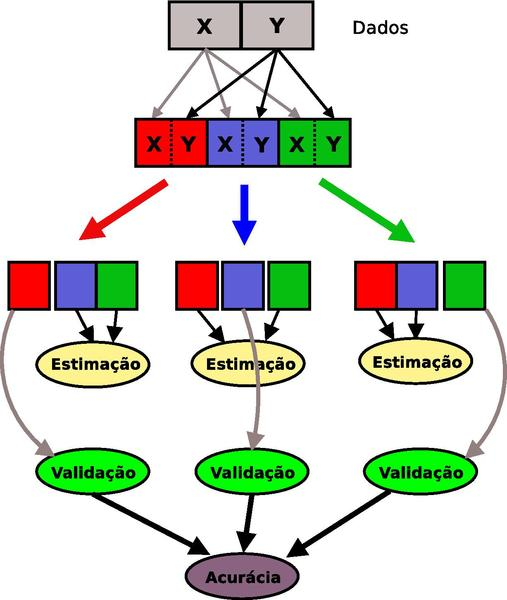
Exemplo do esquema de particionamento e execução do método k-fold com k = 3.

Ao final das k iterações calcula-se a acurácia sobre os erros encontrados, através da equação descrita anteriormente, obtendo assim uma medida mais confiável sobre a capacidade do modelo de representar o processo gerador dos dados.

### Método leave-one-out
O método leave-one-out é um caso específico do k-fold, com k igual ao número total de dados N. Nesta abordagem são realizados N cálculos de erro, um para cada dado.

Apesar de apresentar uma investigação completa sobre a variação do modelo em relação aos dados utilizados, este método possui um alto custo computacional, sendo indicado para situações onde poucos dados estão disponíveis.

In [12]:
def leave_one_out(df, shuffle=True):

    # Shuffle the dataframe if the shuffle is set to true
    if shuffle:
        df = df.sample(frac=1).reset_index(drop=True)

    # Convert the rows of the dataframe into a list of lists
    data = []
    for row in df.iterrows():
        index, values = row
        data.append(values.tolist())

    # Create a list of lists, in which each iteration of leave one out will be stored
    X_train = []
    X_test = []
    y_train = []
    y_test = []

    for i in range(len(data)):
        train = data.copy()
        train.remove(data[i])

        test = data[i]

        # Get the correspondent labels to each feature vector
        y_train.append([int(x[-1]) for x in train])
        y_test.append(int(test[-1]))

        # Remove the labels from the train and test vectors
        X_train.append([x[:-1] for x in train])
        X_test.append(test[:-1])

    return X_train, X_test, y_train, y_test

## Distância Euclidiana 

(x, xi) = sqrt (soma ((xj – xij) ^ 2))

### Outras medidas populares de distância incluem:

<p><b> Distância de Hamming: </b> Calcula a distância entre os vetores binários.</p>
<p><b>Manhattan Distance: </b> Calcula a distância entre vetores reais usando a soma de sua diferença absoluta. Também chamado de City Block Distance.</p>

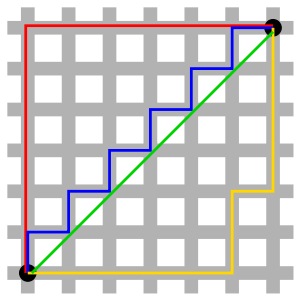imagem representando a distância eucliana em verde e a cityblock

<p><b>Distância Minkowski: </b> Generalização da distância Euclidiana e Manhattan.</p>



In [13]:
def euclidean_dist(x1, x2):
    dist = 0.0
    for x, y in zip(x1, x2):
        dist += pow(float(x) - float(y), 2)
    dist = math.sqrt(dist)

    return dist

## k-nearest neighbors
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

<p>In <b>k-NN classification</b>, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.</p>
<p>In <b>k-NN regression </b>, the output is the property value for the object. This value is the average of the values of k nearest neighbors.</p>
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.

The neighbors are taken from a set of objects for which the class (for k-NN classification) or the object property value (for k-NN regression) is known. This can be thought of as the training set for the algorithm, though no explicit training step is required.

A peculiarity of the k-NN algorithm is that it is sensitive to the local structure of the data.

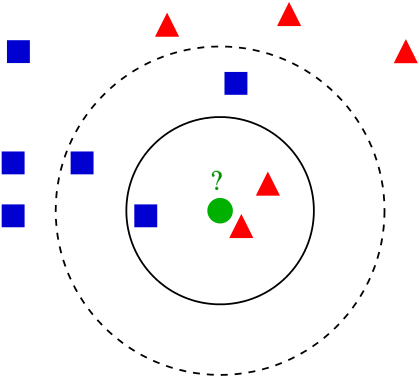

<b>observação </b>

  
    
   <p>O KNN armazena todo o conjunto de dados de treinamento que ele usa como sua representação.
KNN não aprende nenhum modelo.</p>
    <p>A KNN faz predições just-in-time calculando a similaridade entre uma amostra de entrada e cada instância de treinamento.</p>
    <p>Existem muitas medidas de distância para escolher para corresponder à estrutura dos dados de entrada.
É uma boa ideia redimensionar seus dados, como usar a normalização, ao usar o KNN.</p>


In [14]:
def knn_clf(X_train, X_test, y_train, k_neighbors=3):
    assert (k_neighbors % 2), 'Number of neighbors must be odd!'

    predict = []
    for x1 in X_test:
        class_prediction = np.zeros(max(y_train) + 1)
        euclidean_distance = []

        for x2, label2 in zip(X_train, y_train):
            eu_dist = euclidean_dist(x1, x2)
            euclidean_distance.append((label2, eu_dist))
            euclidean_distance.sort(key=operator.itemgetter(1))
            smaller_k_distances = euclidean_distance[:k_neighbors]

            for label, dist in smaller_k_distances:
                class_prediction[int(label)] += 1

        predict.append(max(range(len(class_prediction)), key=class_prediction.__getitem__))

    return predict


In [17]:
if __name__ == '__main__':

    # Read the file with the features to classify
    filename = 'features.txt'
    features = read_data(filename)

    # Split the database using hold out
    X_train, X_test, y_train, y_test = hold_out(features, train_size=0.8)

    # Apply knn (you can change the number of neighbors)
    predictions = knn_clf(X_train, X_test, y_train, k_neighbors=7)

    # Calculates the accuracy using hold out
    count = 0
    for x, y in zip(y_test, predictions):
        if x == y:
            count += 1

    accuracy = count/len(y_test)
    print('Accuracy using hold out: {:.4f}'.format(accuracy))

    # Save the true and the predicted labels to use in question 59 and 60
    with open('true_and_predict_53.csv', 'w') as outfile:
        rows = [y_test, predictions]
        writer = csv.writer(outfile, delimiter=',')
        writer.writerows(rows)

    # Split the database using leave one out
    X_train, X_test, y_train, y_test = leave_one_out(features)

    # Apply knn (you can change the number of neighbors)
    predictions = np.zeros(int(max(y_train[0])) + 1)
    count = 0
    for train_set, test_set, label_train, label_test in zip(X_train, X_test, y_train, y_test):

        test_list = []
        test_list.append(test_set)
        predict = knn_clf(train_set, test_list, label_train, k_neighbors=7)
        predictions[predict] += 1

        if predict[0] == label_test:
            count += 1

    accuracy = count / len(y_test)

    print('Accuracy using leave one out: {:.4f}'.format(accuracy))
    
    #opencv
    # Split the database using hold out
    X_train, X_test, y_train, y_test = hold_out(features, train_size=0.9)

    # Reshape train label data to fit the format of opencv
    y_train = np.reshape(y_train, (-1, 1))

    # Apply knn (you can change the number of neighbors)
    knn = cv2.ml.KNearest_create()
    knn.train(np.asarray(X_train, np.float32), cv2.ml.ROW_SAMPLE, y_train)

    # Predict in the test data (you can vary the number of k)
    ret, results, neighbors, dist = knn.findNearest(np.asarray(X_test, np.float32), k=3)

    # Convert the results to a list
    predictions = [int(x) for x in results]

    # Calculates the accuracy using hold out
    count = 0
    for x, y in zip(y_test, predictions):
        if x == y:
            count += 1

    accuracy = count/len(y_test)
    print('Accuracy using hold out - OpenCV: {:.4f}'.format(accuracy))

    # Save the true and the predicted labels to use in question 59 and 60
    with open('true_and_predict_55.csv', 'w') as outfile:
        rows = [y_test, predictions]
        writer = csv.writer(outfile, delimiter=',')
        writer.writerows(rows)

    # Split the database using leave one out
    X_train, X_test, y_train, y_test = leave_one_out(features)

    # Apply knn (you can change the number of neighbors)
    predictions = np.zeros(int(max(y_train[0])) + 1)
    count = 0
    for train_set, test_set, label_train, label_test in zip(X_train, X_test, y_train, y_test):

        # Reshape train label data to fit the format of opencv
        label_train = np.reshape(label_train, (-1, 1))

        knn = cv2.ml.KNearest_create()
        knn.train(np.asarray(train_set, np.float32), cv2.ml.ROW_SAMPLE, label_train)

        # Predict in the test data (you can vary the number of k)
        test_list = []
        test_list.append(test_set)
        ret, results, neighbors, dist = knn.findNearest(np.asarray(test_list, np.float32), k=3)

        if results[0] == label_test:
            count += 1

    accuracy = count / len(y_test)

    print('Accuracy using leave one out - OpenCV: {:.4f}'.format(accuracy))

Accuracy using hold out: 0.8211
Accuracy using leave one out: 0.8710
Accuracy using hold out - OpenCV: 0.8750
Accuracy using leave one out - OpenCV: 0.9239
